In [1]:
import cv2

In [3]:
# 读取图片
img = cv2.imread('lenna.png')
# 输出图片高度和宽度
h, w = img.shape[:2]
print('height:',h,'width:',w)

height: 512 width: 512


# 灰度化实现

In [5]:
import numpy as np
img_gray = np.zeros([h,w], img.dtype)

for i in range(h):
    for j in range(w):
        tmp = img[i, j]
        # cv读取的三通道为GBR
        img_gray[i, j] = 0.3 * tmp[2] + 0.59 * tmp[1] + 0.11 * tmp[0]
img_gray

array([[162, 162, 162, ..., 169, 155, 128],
       [162, 162, 162, ..., 169, 155, 128],
       [162, 162, 162, ..., 169, 155, 128],
       ...,
       [ 42,  42,  49, ..., 104, 100,  98],
       [ 43,  43,  54, ..., 103, 105, 108],
       [ 43,  43,  54, ..., 103, 105, 108]], dtype=uint8)

In [7]:
# 只使用cv2.imshow会卡死
cv2.imshow('Gray Image', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, '灰度化')

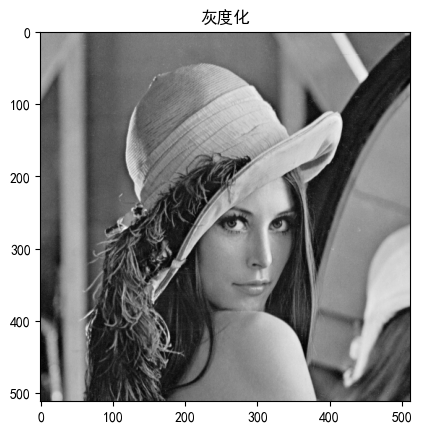

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False
plt.imshow(img_gray, cmap='gray')
plt.title('灰度化')

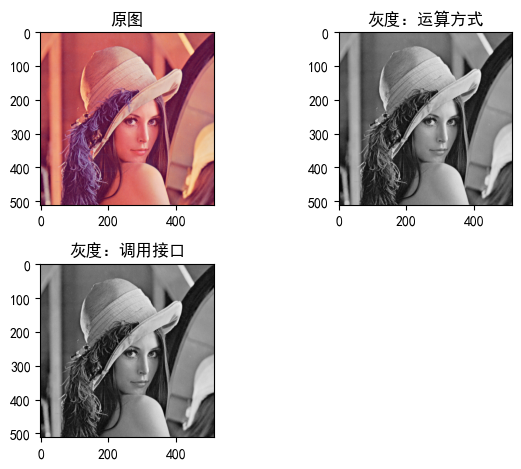

In [17]:
from skimage.color import rgb2gray
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(221)
plt.imshow(img_rgb) 
plt.title('原图')
plt.subplot(222)
plt.imshow(img_gray, cmap='gray')
plt.title('灰度：运算方式')
plt.subplot(223)
img_plt = rgb2gray(img_rgb)
plt.imshow(img_plt, cmap='gray')
plt.title('灰度：调用接口')
plt.tight_layout() # 调整图像间距
plt.show()

# 二值化实现

In [18]:
img_plt

array([[0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       [0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       [0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       ...,
       [0.13746353, 0.13746353, 0.16881412, ..., 0.37271804, 0.35559529,
        0.34377725],
       [0.14617059, 0.14617059, 0.18730588, ..., 0.36788784, 0.37292549,
        0.38467529],
       [0.14617059, 0.14617059, 0.18730588, ..., 0.36788784, 0.37292549,
        0.38467529]])

In [20]:
img_binary = np.where(img_plt >= 0.5, 1, 0) 
img_binary

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.0, '二值化结果')

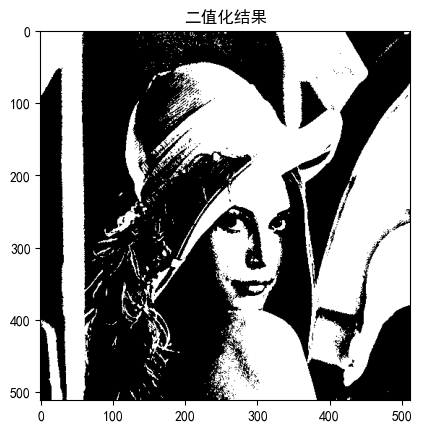

In [21]:
plt.imshow(img_binary, cmap='gray')
plt.title('二值化结果')

# 最临近差值实现

In [25]:
new_height = 800
new_width = 800
def function(img):
    h,w,c =img.shape
    image_big = np.zeros((new_height,new_width,c),img.dtype)
    sh=new_height/h
    sw=new_width/w
    for i in range(new_height):
        for j in range(new_width):
            x=int(i/sh + 0.5)  #转为整型，使用向下取整。
            y=int(j/sw + 0.5)
            image_big[i,j]=img[x,y]
    return image_big

[[[226 137 125]
  [226 137 125]
  [226 137 125]
  ...
  [221 130 110]
  [200  99  90]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [226 137 125]
  ...
  [221 130 110]
  [200  99  90]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [226 137 125]
  ...
  [221 130 110]
  [200  99  90]
  [200  99  90]]

 ...

 [[ 82  22  57]
  [ 82  22  57]
  [ 82  22  57]
  ...
  [181  71  81]
  [185  74  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 82  22  57]
  ...
  [181  71  81]
  [185  74  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 82  22  57]
  ...
  [181  71  81]
  [185  74  81]
  [185  74  81]]]


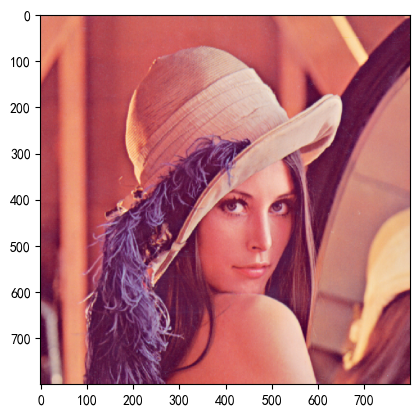

In [27]:
img = cv2.imread('lenna.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGR转RGB
zoom = function(img)
print(zoom)
plt.imshow(zoom)